### <h2><center><font color='orange'>Data Cleaning<font></a>

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
%matplotlib inline


In [98]:
file_path = 'personal-loan.csv'  # Update this path if needed
df = pd.read_csv(file_path)
df.head()


,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
0,3815,40.0,9.0,3.0,Graduate,60.0,0,yes,1.7,0,0,yes,no
1,5737,65.0,27.0,4.0,Advanced or Professional,36.0,90,no,0.0,0,0,yes,no
2,4209,61.0,3.0,2.0,Undergraduate,145.0,314,no,0.0,0,1,yes,yes
3,4734,29.0,14.0,1.0,Undergraduate,52.0,0,no,0.0,1,0,yes,no
4,2551,43.0,23.0,4.0,Graduate,33.0,0,no,0.0,0,0,yes,no


In [100]:
df.tail()

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
5995,5440,36.0,4.0,1.0,Undergraduate,72.0,0,no,0.0,0,0,yes,no
5996,1251,56.0,25.0,2.0,Undergraduate,110.0,0,no,0.0,0,0,no,no
5997,2454,34.0,11.0,2.0,Advanced or Professional,57.0,0,no,0.0,1,0,yes,no
5998,1435,30.0,NaN,2.0,Undergraduate,85.0,81,no,0.0,0,0,yes,no
5999,1409,47.0,22.0,3.0,Graduate,141.0,0,yes,2.1,0,0,no,no


In [101]:
print("\t\t\t-------------------")
print("Shape of the dataframe is:","Columns || Rows")
print("\t\t\t-------------------")
print("\t\t\t      ",df.shape)

			-------------------
Shape of the dataframe is: Columns || Rows
			-------------------
			       (6000, 13)


In [105]:
# Basic statistics of the dataset
df.describe(include='all')

,customer_id,age,yrs_experience,family_size,education_level,income,mortgage_amt,credit_card_acct,credit_card_spend,share_trading_acct,fixed_deposit_acct,online_acct,personal_loan
count,6000.000000,5620.000000,5636.000000,5615.000000,6000,5623.000000,6000.000000,6000,6000.000000,6000.000000,6000.000000,6000,6000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,2,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,Undergraduate,NaN,NaN,no,NaN,NaN,NaN,yes,no
freq,NaN,NaN,NaN,NaN,2455,NaN,NaN,4217,NaN,NaN,NaN,3613,5100
mean,3027.886667,45.556940,21.182221,2.468566,NaN,88.143873,67.585667,NaN,0.627467,0.099167,0.078167,NaN,NaN
std,1723.488432,13.373778,13.247945,1.215636,NaN,48.736053,88.155099,NaN,1.423450,0.298911,0.268456,NaN,NaN
min,3.000000,23.000000,0.000000,1.000000,NaN,8.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,1553.750000,34.000000,10.000000,1.000000,NaN,52.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
50%,3045.500000,45.000000,21.000000,2.000000,NaN,82.000000,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN
75%,4511.000000,56.000000,32.000000,4.000000,NaN,118.000000,125.000000,NaN,0.400000,0.000000,0.000000,NaN,NaN


### Handling Null Values

In [108]:
# Check for missing values
print(" Columns \t Null Values")
print("----------------------------")
print(df.isnull().sum())


 Columns 	 Null Values
----------------------------
customer_id             0
age                   380
yrs_experience        364
family_size           385
education_level         0
income                377
mortgage_amt            0
credit_card_acct        0
credit_card_spend       0
share_trading_acct      0
fixed_deposit_acct      0
online_acct             0
personal_loan           0
dtype: int64


In [109]:
# Example: Fill missing values with median (update according to your dataset)
df.fillna(df.median(), inplace=True)

# If no missing values:
print("No missing values to handle.")


No missing values to handle.


C:\Users\Hp\AppData\Local\Temp\ipykernel_16108\3139284085.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [112]:
# Check for missing values
print(" Columns \t Null Values")
print("----------------------------")
print(df.isnull().sum())
print("\n No Missing Values")

 Columns 	 Null Values
----------------------------
customer_id           0
age                   0
yrs_experience        0
family_size           0
education_level       0
income                0
mortgage_amt          0
credit_card_acct      0
credit_card_spend     0
share_trading_acct    0
fixed_deposit_acct    0
online_acct           0
personal_loan         0
dtype: int64

 No Missing Values


C:\Users\Hp\AppData\Local\Temp\ipykernel_16108\3855182816.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


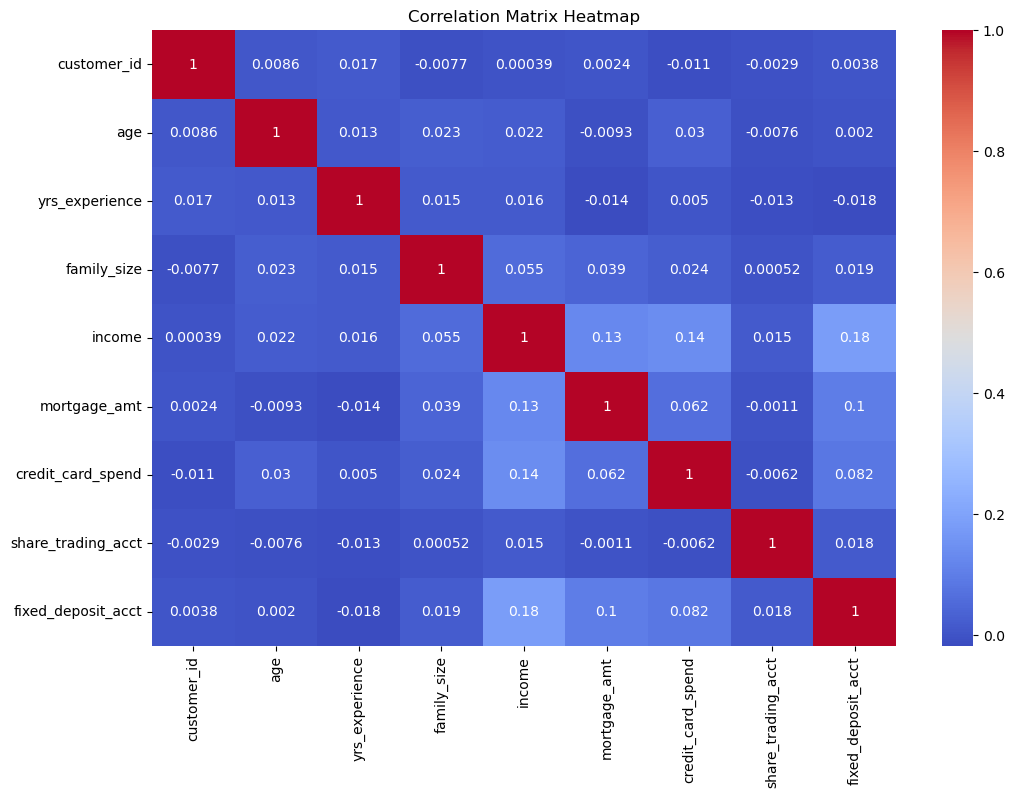

In [114]:
# Correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

### Checking Duplicates

In [83]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = data.duplicated()

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()

# Print the number of duplicate rows
print(f"Number of duplicate rows: {num_duplicate_rows}")


Number of duplicate rows: 0


#### No Duplicate Values

### Removing Outliers

<Figure size 1500x1000 with 0 Axes>

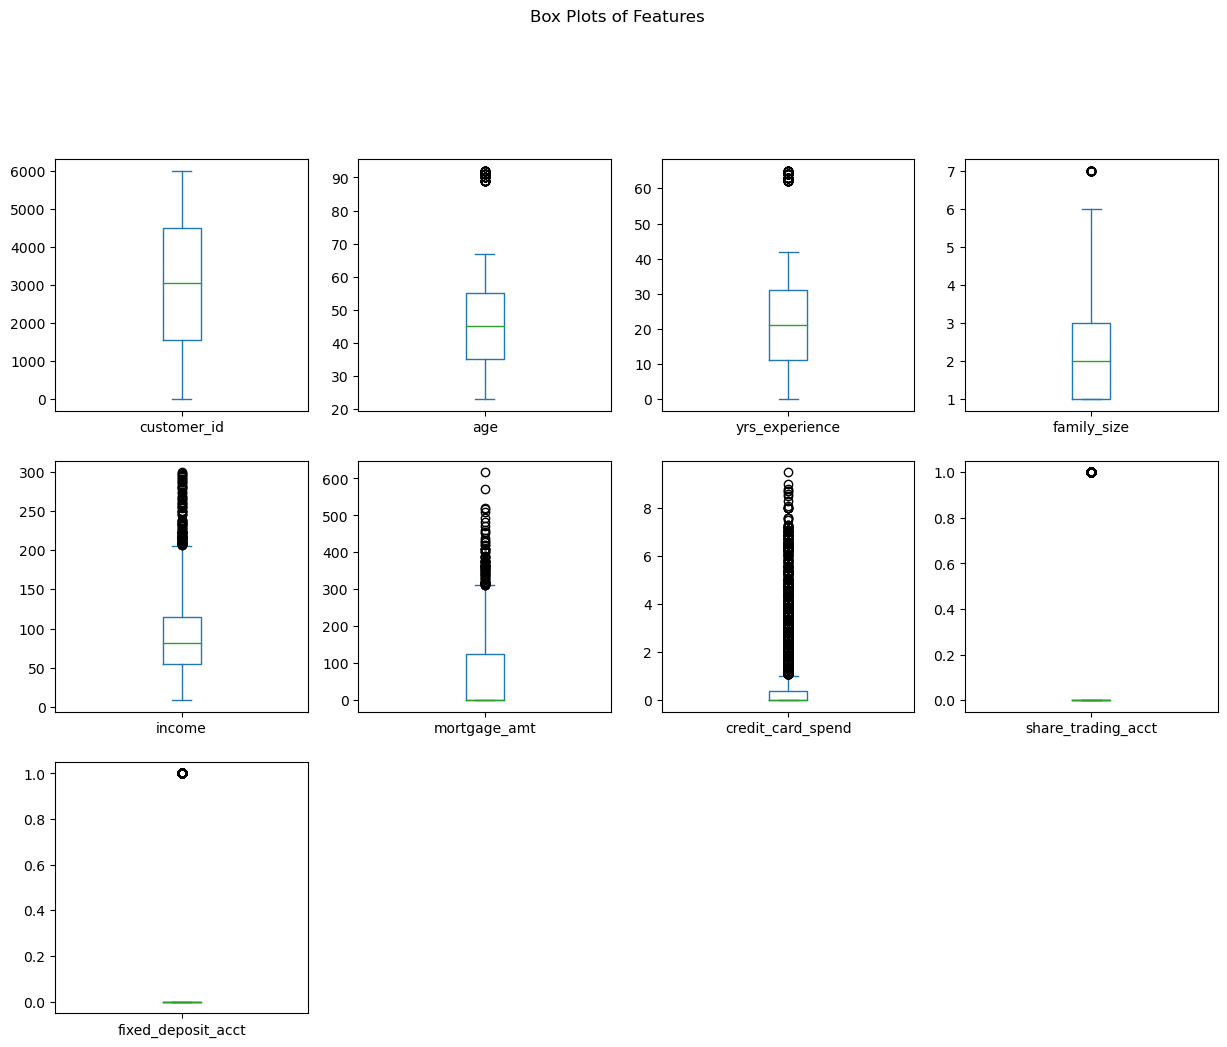

In [113]:
# Box plots to check for outliers
plt.figure(figsize=(15, 10))
df.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False, figsize=(15, 15))
plt.suptitle("Box Plots of Features")
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_16108\3678652822.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


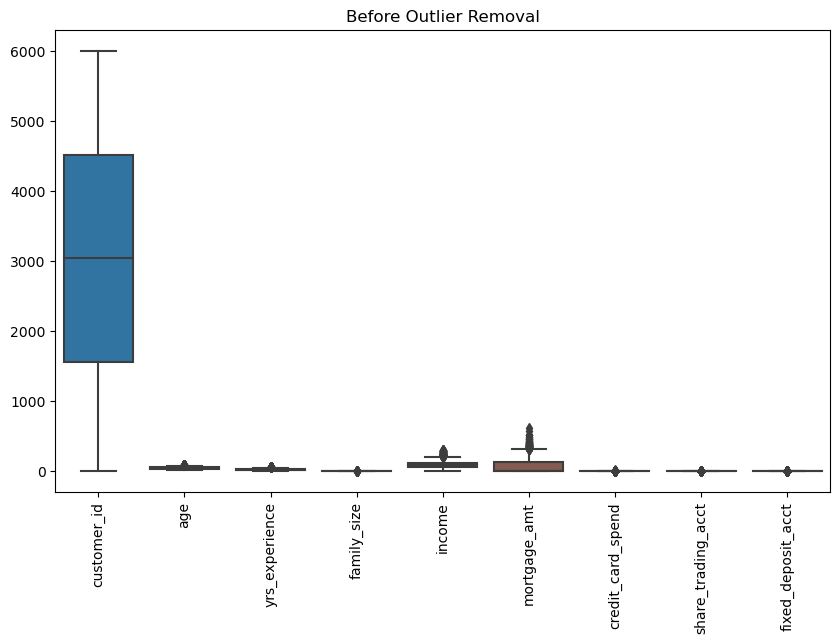

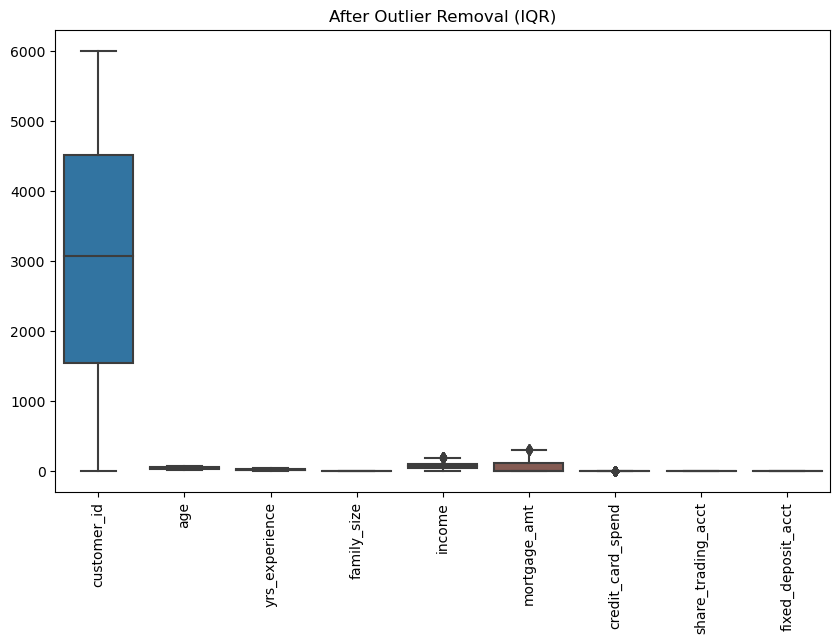

((6000, 13), (3944, 13))

In [117]:
# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25, numeric_only=True)
    Q3 = df.quantile(0.75, numeric_only=True)
    IQR = Q3 - Q1
    return df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove outliers
df_outliers_removed_iqr = remove_outliers_iqr(df)
df_outliers_removed_zscore = remove_outliers_zscore(df)

# Visualize with boxplot
def plot_boxplots(df, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df.select_dtypes(include=[np.number]))
    plt.xticks(rotation=90)
    plt.title(title)
    plt.show()

plot_boxplots(df, "Before Outlier Removal")
plot_boxplots(df_outliers_removed_iqr, "After Outlier Removal (IQR)")

# Verify the changes
(df.shape, df_outliers_removed_iqr.shape)


Certainly! Here's a explanation of removing Outliers:

1. **IQR Method:**
   - **Calculate IQR:** The Interquartile Range (IQR) is calculated for each numerical column.
   - **Identify Outliers:** Values outside the range \( Q1 - 1.5 \times IQR \) to \( Q3 + 1.5 \times IQR \) are considered outliers.
   - **Remove Outliers:** Rows with outliers are removed.


2. **Visualization:** Boxplots are created to visualize the distribution of numerical columns before and after outlier removal.

3. **Results Comparison:** The shapes of the original and modified datasets are compared to see the effect of outlier removal.

In summary, the code identifies and removes outliers from the dataset using both the IQR and Z-score methods, then visualizes and compares the results.

In [129]:
# Specify the categorical columns
categorical_columns = ['credit_card_acct', 'online_acct', 'personal_loan', 'education_level']

# Apply One-Hot Encoding to the categorical columns
df_encoded = pd.get_dummies(df_outliers_removed_iqr, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded dataframe
df_encoded.head(10)

,customer_id,age,yrs_experience,family_size,income,mortgage_amt,credit_card_spend,share_trading_acct,fixed_deposit_acct,credit_card_acct_yes,online_acct_yes,personal_loan_yes,education_level_Graduate,education_level_Undergraduate
1,5737,65.0,27.0,4.0,36.0,90,0.0,0,0,0,1,0,0,0
4,2551,43.0,23.0,4.0,33.0,0,0.0,0,0,0,1,0,1,0
5,4491,44.0,18.0,3.0,49.0,0,0.0,0,0,0,1,0,0,0
6,706,42.0,16.0,4.0,23.0,0,0.0,0,0,0,1,0,0,0
7,5327,64.0,38.0,2.0,112.0,0,0.0,0,0,0,0,0,0,1
8,5269,43.0,7.0,4.0,28.0,83,0.9,0,0,1,1,0,1,0
9,1918,25.0,8.0,1.0,47.0,0,0.0,0,0,0,0,0,0,1
10,4542,45.0,21.0,2.0,82.0,155,0.0,0,0,0,1,0,0,1
11,4359,25.0,15.0,2.0,40.0,0,0.0,0,0,0,1,0,0,0
13,3783,64.0,25.0,3.0,77.0,173,0.0,0,0,0,1,0,0,1


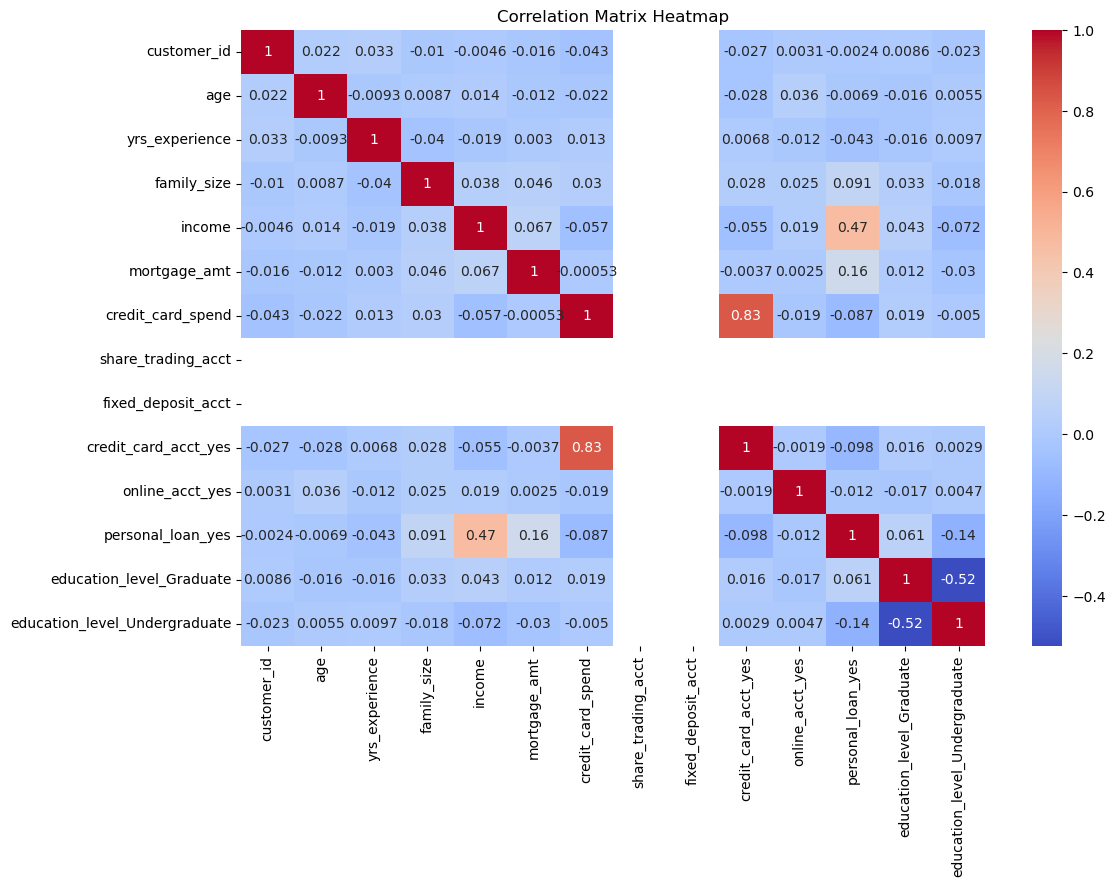

In [131]:
# Correlation matrix
correlation_matrix = df_encoded.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [132]:
# Save the cleaned and encoded DataFrame to a pickle file
pickle_file_path = 'cleaned_personal_loan_encoded.pkl'
df_encoded.to_pickle(pickle_file_path)

print(f"Cleaned and encoded dataset saved to {pickle_file_path}")

Cleaned and encoded dataset saved to cleaned_personal_loan_encoded.pkl
